#Importing libraries and Exploring the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier
#confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Definining Exploratory Data Analysis with an overview of the whole project

In [7]:
#encoding
data['Gender']=pd.get_dummies(data['Gender'], drop_first=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    uint8
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB


In [10]:
data = data.drop(columns=['CustomerID'])

In [11]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#Checking missing values and Outliers & Creating visual methods to analyze the data

In [12]:
data.duplicated().sum()

0

In [13]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
#outliers:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(upper_bound)
print(lower_bound)

79.375
-1.625


In [15]:
cnt=0
for i in range(len(data)):
  if data['Age'].iloc[i] > upper_bound:
          cnt+=1
  if data['Age'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

0


In [16]:
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(upper_bound)
print(lower_bound)

132.75
-13.25


In [17]:
cnt=0
for i in range(len(data)):
  if data['Annual Income (k$)'].iloc[i] > upper_bound:
          cnt+=1
  if data['Annual Income (k$)'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

2


In [18]:
for i in range(len(data)):
  if data['Annual Income (k$)'].iloc[i] > upper_bound:
          data.loc[i,'Annual Income (k$)']=data['Annual Income (k$)'].median()
  if data['Annual Income (k$)'].iloc[i] < lower_bound:
          data.loc[i,'Annual Income (k$)']=data['Annual Income (k$)'].median()

In [19]:
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(upper_bound)
print(lower_bound)

130.875
-12.125


In [20]:
cnt=0
for i in range(len(data)):
  if data['Annual Income (k$)'].iloc[i] > upper_bound:
          cnt+=1
  if data['Annual Income (k$)'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

0


In [21]:
Q1 = data['Spending Score (1-100)'].quantile(0.25)
Q3 = data['Spending Score (1-100)'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(upper_bound)
print(lower_bound)

130.375
-22.625


In [22]:
cnt=0
for i in range(len(data)):
  if data['Spending Score (1-100)'].iloc[i] > upper_bound:
          cnt+=1
  if data['Spending Score (1-100)'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

0


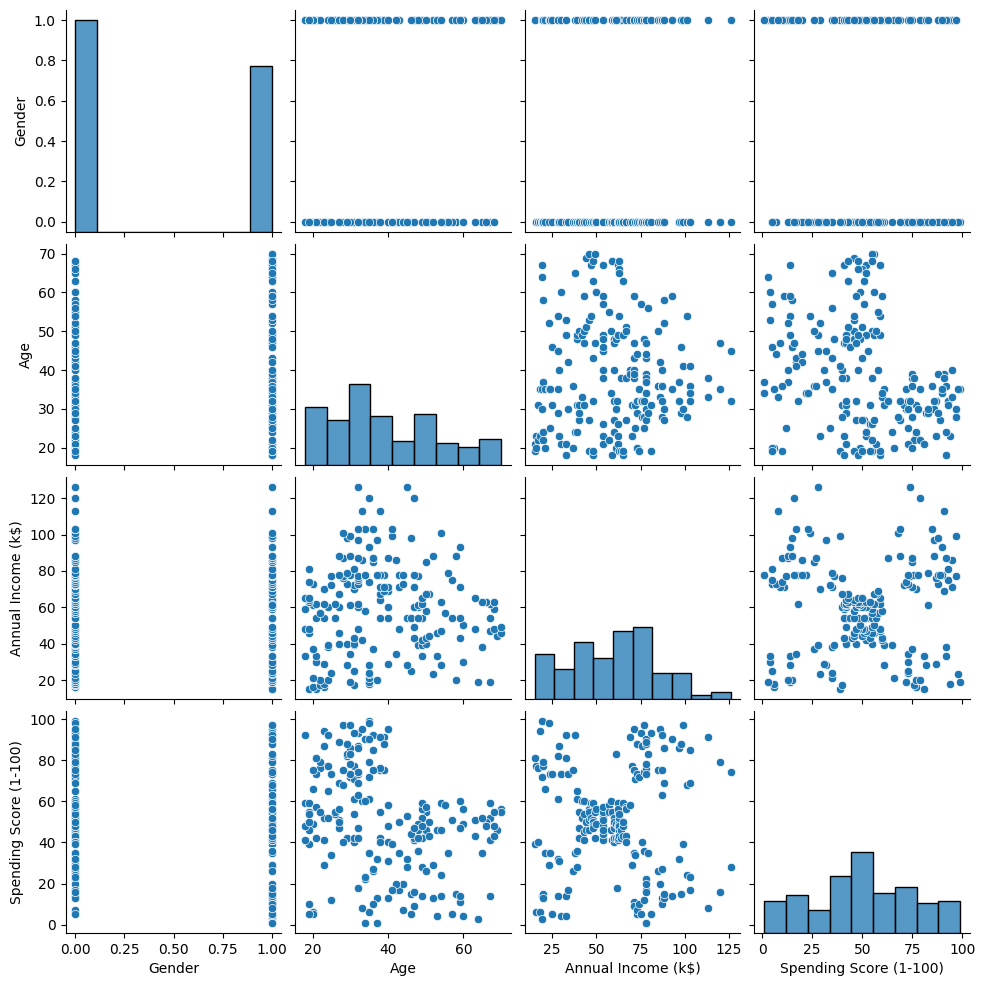

In [23]:
# Pair plot
sns.pairplot(data)
plt.show()

([<matplotlib.patches.Wedge at 0x7eb94e39b190>,
 [Text(-0.20611945413751356, 1.080515974257694, 'F'),
  Text(0.20611945413751367, -1.080515974257694, 'M')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

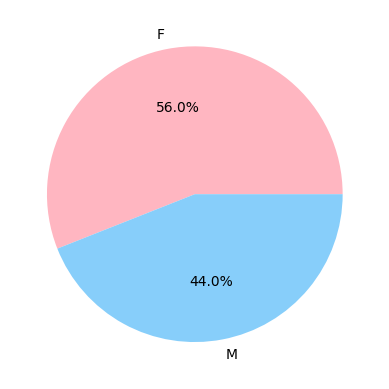

In [24]:
colors = ['#FFB6C1', '#87CEFA']
plt.pie(data.Gender.value_counts(), labels=['F','M'], colors=colors, autopct='%1.1f%%')

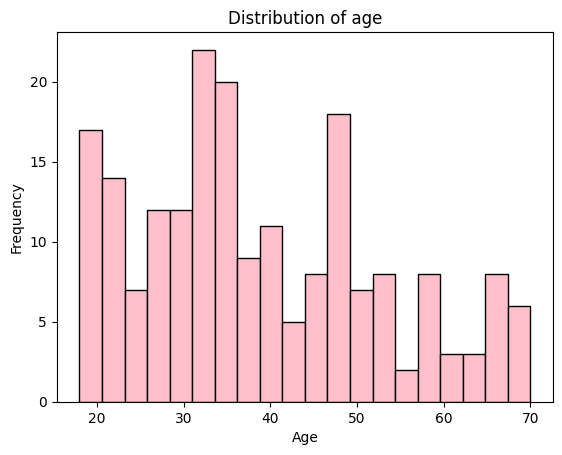

In [25]:
# Histogram
plt.hist(data['Age'], bins=20,edgecolor='black',color='pink')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()

In [26]:
age_18_25 = data.Age[(data.Age >= 18) & (data.Age <= 25)]
age_26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age_36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age_46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age_55above = data.Age[data.Age >= 55]

x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = data, x = x_age, y = y_age, color = x_age,
       title = 'Number of customers per age group')

.Age group near 26-36 have the highest frequency

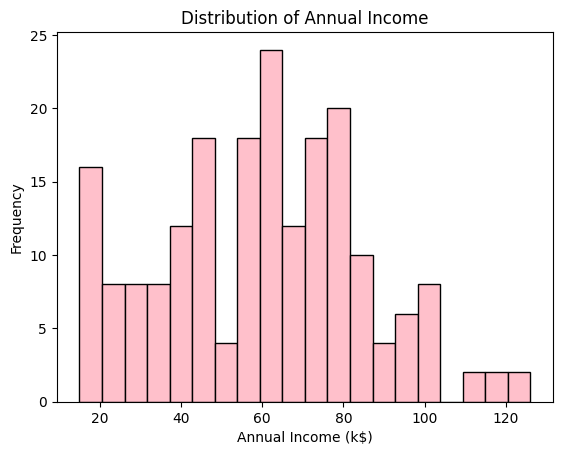

In [27]:
plt.hist(data['Annual Income (k$)'], bins=20,edgecolor='black',color='pink')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()

.Most customers have income in range of 60-80k$

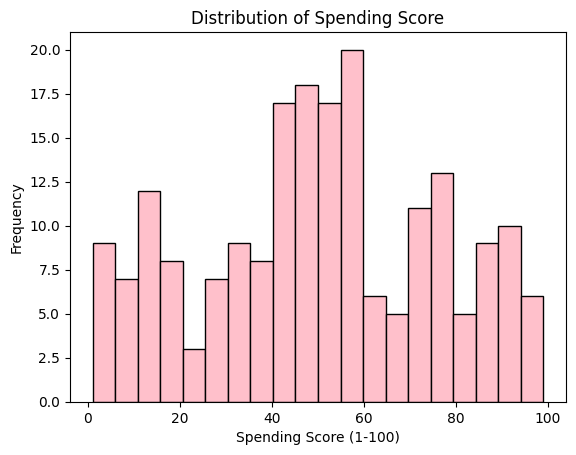

In [28]:
plt.hist(data['Spending Score (1-100)'], bins=20,edgecolor='black',color='pink')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')
plt.show()

.Most of the customers have spending score of 50

In [29]:
px.scatter(data_frame = data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
          title = 'Relation between Annual Income and Spending Score')

.There is no relation between the customers having annual income in the range of 20-40k and 80-150k but there is relation between customers who have annual income in the range of 40-60k

In [30]:
ss_1_20 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 1) &
                                       (data['Spending Score (1-100)'] <= 20)]

ss_21_40 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 21) &
                                       (data['Spending Score (1-100)'] <= 40)]

ss_41_60 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 41) &
                                       (data['Spending Score (1-100)'] <= 60)]

ss_61_80 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 61) &
                                       (data['Spending Score (1-100)'] <= 80)]

ss_81_100 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 81) &
                                       (data['Spending Score (1-100)'] <= 100)]

x_ss = ['1-20', '21-40', '41-60', '61-80', '81-100']
y_ss = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values),
        len(ss_81_100.values)]

px.bar(data_frame = data, x = x_ss, y = y_ss, color = x_ss,
       title = 'Number of customers per Spending Score group')

.Most of the customers spending score is between 41-60k$

In [31]:
ai_0_30 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 0) & (data['Annual Income (k$)'] <= 30)]
ai_31_60 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 31)&(data['Annual Income (k$)'] <= 60)]
ai_61_90 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 61)&(data['Annual Income (k$)'] <= 90)]
ai_91_120 = data['Annual Income (k$)'][(data['Annual Income (k$)']>= 91)&(data['Annual Income (k$)']<=120)]
ai_121_150 = data['Annual Income (k$)'][(data['Annual Income (k$)']>=121)&(data['Annual Income (k$)']<=150)]

x_ai = ['$ 0-30,000', '$ 30,001-60,000', '$ 60,001-90,000', '$ 90,001-120,000', '$ 120,000-150,000']
y_ai = [len(ai_0_30.values) , len(ai_31_60.values) , len(ai_61_90.values) , len(ai_91_120.values),
         len(ai_121_150.values)]

px.bar(data_frame = data, x = x_ai, y = y_ai, color = x_ai,
       title = 'Number of customers per Annual Income group')

.Most of the customers annual income lies between 60k-90k$

#Model creation and data fitting

In [32]:
x = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

In [33]:
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x)
DBlabels = dbscan.labels_

In [34]:
#calculating the number of clusters
n_clusters_ = len(set(DBlabels)) - (1 if -1 in DBlabels else 0)
n_noise_ = list(DBlabels).count(-1)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

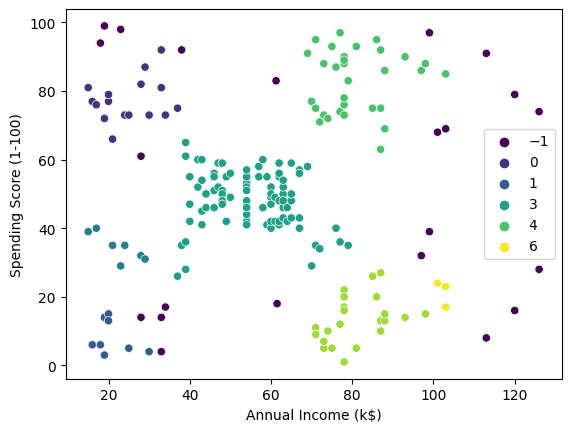

In [35]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",hue = DBlabels,  data=data,palette='viridis')

.DBscan wasn't an accurate model so we can try another model that fits better

KMeans:

->kmeans clustering using `Annual Income` and `Spending Score`

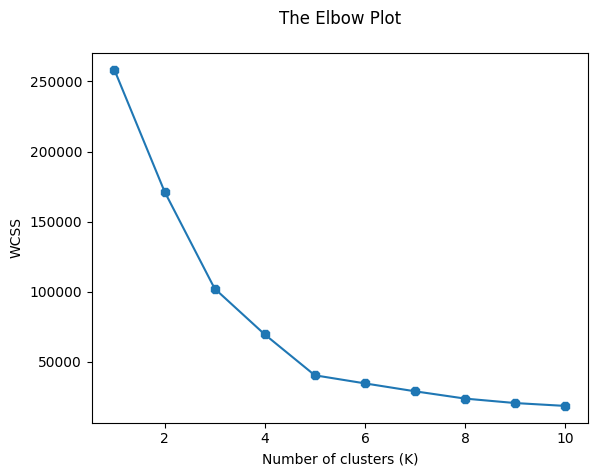

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = '8')
plt.title('The Elbow Plot\n')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [37]:
#Therefore: K=5
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init='random', max_iter=300, random_state=0)
y_predicted = kmeans.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])
data['Clusters'] = kmeans.labels_

In [38]:
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [85.65277778 17.58333333]
 [25.72727273 79.36363636]
 [55.0875     49.7125    ]
 [84.59615385 82.12820513]]


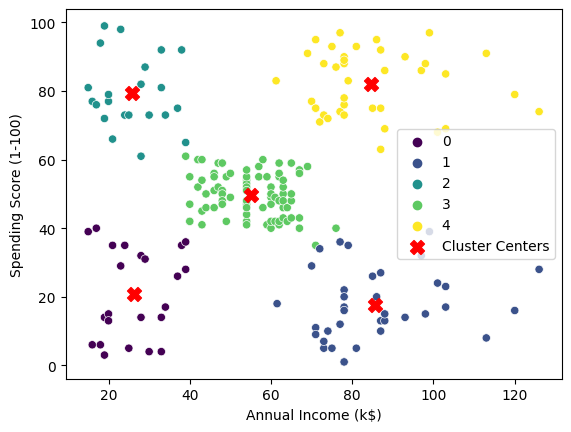

In [39]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",hue = 'Clusters',  data=data,palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

plt.legend()
plt.show()

->kmeans clustering using `Age`, `Annual Score` and `Spending Score`

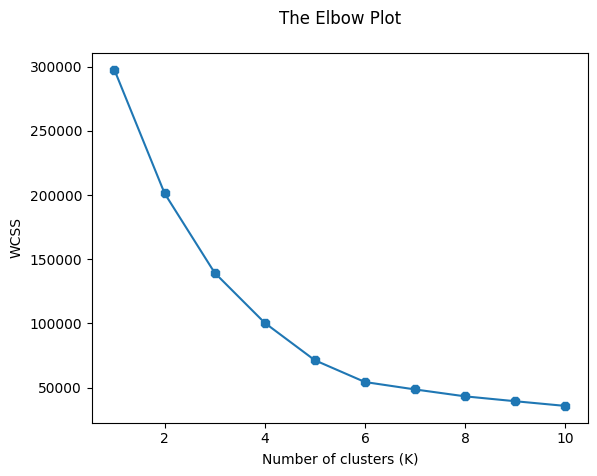

In [40]:
AAS = data.iloc[:, 1:]

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(AAS)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker = '8')
plt.title('The Elbow Plot\n')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [41]:
#Therefore: K=6
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(AAS)
AAS['label'] = clusters

In [42]:
fig = px.scatter_3d(AAS, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'label', size = 'label')
fig.show()

. kmeans was much more accurate and here what we analyzed from the graph

cluster 0 : (low annual income and low spending score)

*   Potential interpretation: This cluster represents customers with low income and low spending tendencies. They might be budget-conscious individuals who prioritize saving over spending.
*   Business Implications: Offer cost-effective products or services to cater to their preferences. Implement targeted marketing campaigns that highlight affordability.


cluster 1 : (high annual income and low spending score)


*   Potential interpretation: This cluster might represent customers with high income but relatively low spending habits. They might be more frugal or value-conscious shoppers. Consider labeling this cluster as "Sensible Spenders" or "Income-Driven Shoppers."
*   Business Implications: Tailor marketing strategies to emphasize value, discounts, and savings to attract and retain customers in this segment.




cluster 2 : (low annual income and high spending score)


*  Potential interpretation: Customers in this cluster have relatively low income but high spending habits. They might be young or impulsive shoppers who prioritize immediate gratification.
*  Business Implications: Consider strategies to increase their loyalty through affordable options, promotions, and engagement strategies.




cluster 3 : (Moderate Annual Income, Moderate Spending Score)


*   Potential interpretation: Customers in this cluster have average income and moderate spending behavior. They might be balanced shoppers who spend within their means.
*   Business Implications: Focus on maintaining customer satisfaction in this group. Consider strategies to encourage repeat purchases and build loyalty.




cluster 4 : (High Annual Income, High Spending Score)


* Potential interpretation: This cluster consists of customers with high income and high spending tendencies. They might be high-value shoppers who are willing to spend more on premium products and experiences.
*   Business Implications: Offer personalized and exclusive offerings to cater to their preferences. Create loyalty programs or VIP experiences to retain these valuable customers.

#Clustering accuracy

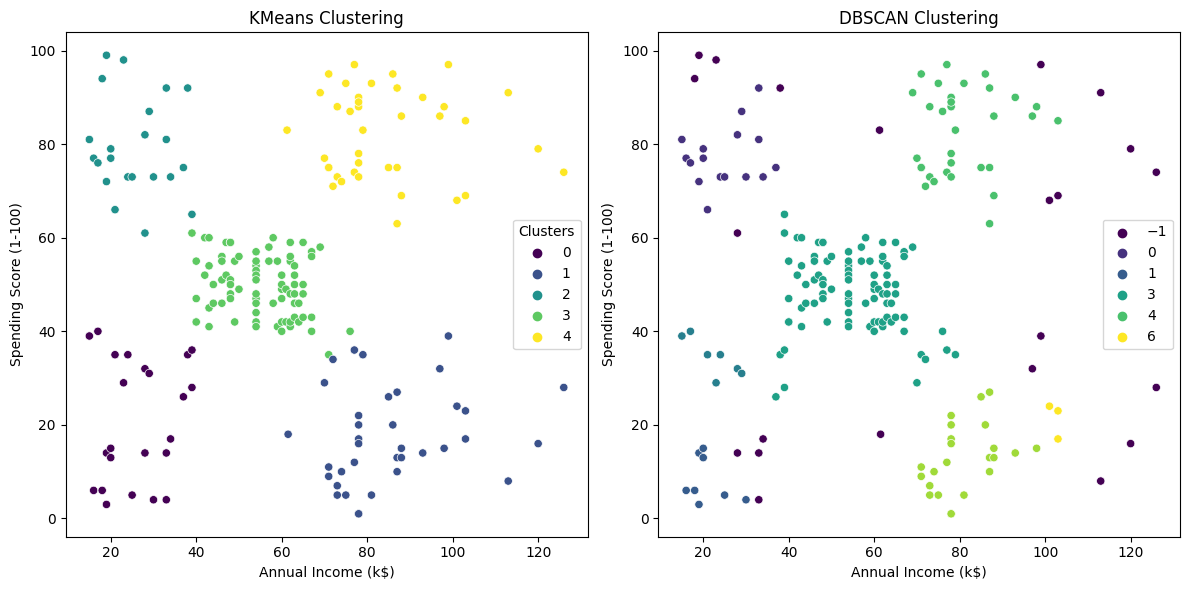

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue='Clusters', data=data, palette='viridis', ax=axes[0])
axes[0].set_title("KMeans Clustering")
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue=DBlabels, data=data, palette='viridis', ax=axes[1])
axes[1].set_title("DBSCAN Clustering")
plt.tight_layout()
plt.show()

Silhoutte score:

In [45]:
kmeans_silhouette = silhouette_score(data, data['Clusters'])
dbscan_silhouette = silhouette_score(data, DBlabels)

print(f"KMeans Silhouette Score: {kmeans_silhouette:.3f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

KMeans Silhouette Score: 0.446
DBSCAN Silhouette Score: 0.253


* Higher silhouette scores generally indicate better-defined clusters. KMeans silhouette score is higher, therefore KMeans model is better for this type of data.

#Saving the KMeans clustering model and the data with cluster label

In [46]:
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']

In [47]:
data.to_csv("Clustered_customer_Data.csv")

#Training and testing the model accuracy using decision tree

In [48]:
#splitting dataset
X=data.drop(['Clusters'],axis=1)
y=data[['Clusters']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#decision tree
model=DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [50]:
#confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3  0  0  0  0]
 [ 0 10  0  2  0]
 [ 0  0  2  1  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.83      0.91        12
           2       1.00      0.67      0.80         3
           3       0.85      1.00      0.92        17
           4       1.00      1.00      1.00         5

    accuracy                           0.93        40
   macro avg       0.97      0.90      0.93        40
weighted avg       0.94      0.93      0.92        40



#Saving the decision tree model for future prediction

In [51]:
filename='final_model.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model=pickle.load(open(filename, 'rb'))
result=loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

0.925 % Accuracy
